# Evaluate Gyroscope Data

Gyroscope data for several digits have been recorded. This notebook evaluates those data

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
stroke_type = "eight"
series_number = "1"

In [3]:
gyroscope_data_list = []

In [4]:
f = open("gyro_" + stroke_type + "-" + series_number + ".txt","r")
gyroscope_txt = f.read().split("\n")
f.close()

In [5]:
for i in range(1,len(gyroscope_txt)):
    if gyroscope_txt[i] == "": # skip empty lines
        continue    
    gyro_xyz = gyroscope_txt[i].split(',')
    gyro = [float(gyro_xyz[0]),float(gyro_xyz[1]),float(gyro_xyz[2])]
    gyroscope_data_list.append(gyro)
for i in range(10):
    print(gyroscope_data_list[i])

[112.5523, -84.4752, -28.1381]
[407.4831, -148.9914, 11.7801]
[427.3812, -48.6465, 31.4951]
[-35.7677, 44.4349, 6.592]
[-36.9274, 44.0077, 5.7985]
[-16.8462, 18.9215, 1.1597]
[-1.648, -0.1831, -2.5025]
[-1.1597, -0.6714, -2.7467]
[-1.2207, -0.6104, -2.8077]
[-1.0376, -1.3428, -2.9908]


In [6]:
gyroscope_data = np.array(gyroscope_data_list)


Skip the first few samples which seem to be out of bounds

In [7]:
gyroscope_data = gyroscope_data[6:]

In [8]:
print("Shape of gyroscope data: ",gyroscope_data.shape)

Shape of gyroscope data:  (498, 3)


Revert the y and z axis
This takes into account the way the accelerometer is mounted onto the magic wand

In [9]:
# gyroscope_data[:,0] = -gyroscope_data[:,0]
gyroscope_data[:,1] = -gyroscope_data[:,1]
gyroscope_data[:,2] = -gyroscope_data[:,2]

Plot the data array. It consists on ~ 500 acceleration vectors ax,ay,az

In [10]:
sample_frequency = 104 # Data have been sampled at 104 Hz

In [11]:
def plot_magic_wand_data(data_array,data_name=None,title=None,start_point=None):
    data_x = data_array[:,0]
    data_y = data_array[:,1]
    data_z = data_array[:,2]
    x = np.arange(0,len(data_x)*1.0/sample_frequency,1.0/sample_frequency)
    plt.plot(x,data_x,label="x component")
    plt.plot(x,data_y,label="y_component")
    plt.plot(x,data_z,label="z component")
    plt.xlabel("Time [s]")
    if data_name:
        plt.ylabel(data_name)
    plt.title(title)
    plt.legend()

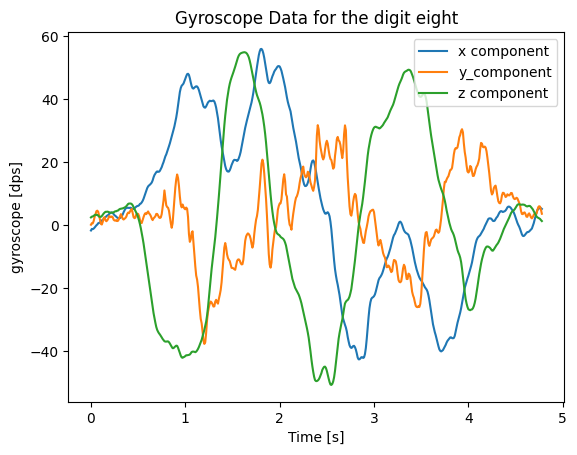

In [12]:
plot_magic_wand_data(gyroscope_data,data_name="gyroscope [dps]",title="Gyroscope Data for the digit " + stroke_type)

### Start evaluation
Estimate the gyroscope drift

In [14]:
current_gyroscope_drift = np.zeros(3)

In [20]:
from math import sqrt
def VectorMagnitude(vector):
    return sqrt(vector[0]*vector[0] + vector[1]*vector[1] + vector[2]*vector[2])

In [21]:
def EstimateGyroscopeDrift(drift):
    isMoving = VectorMagnitude(current_velocity) > 0.2
    if isMoving:
        #print("Moving at index {:d} vector magnitude: {:6.2f}".format(data_index,VectorMagnitude(current_velocity))) 
        return drift
        
    samples_to_average = 20;
    if samples_to_average >= data_index:
        samples_to_average = data_index
    total = np_zeros(3)
    
    for i in range(samples_to_average):
        index = data_index + i
        x_total += gyroscope_data[index]
        entry = gyroscope_data[index]
    drift_array = total / samples_to_average

    return drift_array.aslist()

NameError: name 'current_velocity' is not defined